In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load heart data
df = pd.read_csv('haberman.csv')
df.head()

,age,op_year,ax_nodes,target
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [73]:
# Perform train-test split
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    random_state=24)

Optimizing with f1 score

F-0.5 Score: 0.8173076923076922
F-1 Score: 0.8292682926829269
F-2 Score: 0.8415841584158416


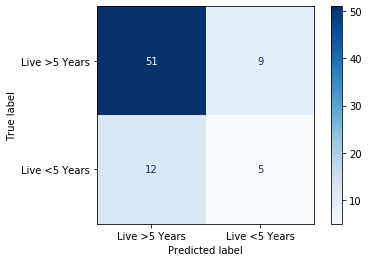

In [79]:
# Fit classifier with best parameters and make test predictions
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, fbeta_score, plot_confusion_matrix

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_hat_test = clf.predict(X_test)

# Display f1 score
print(f'F-0.5 Score: {fbeta_score(y_test, y_hat_test, beta=0.5)}')
print(f'F-1 Score: {f1_score(y_test, y_hat_test)}')
print(f'F-2 Score: {fbeta_score(y_test, y_hat_test, beta=2)}')

# Plot confusion matrix
plot_confusion_matrix(clf, X_test, y_test, cmap='Blues',
                      display_labels=['Live >5 Years', 'Live <5 Years']);

Optimizing with f5 score

F-0.5 Score: 0.7986111111111112
F-1 Score: 0.7863247863247863
F-2 Score: 0.7744107744107745


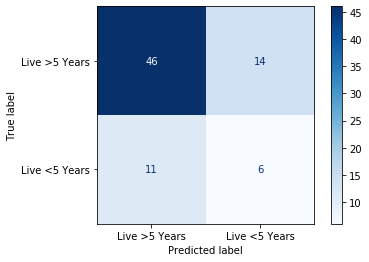

In [82]:
# Perform SMOTE to balance classes
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=1)
smote.fit(X_train, y_train)
X_train, y_train = smote.sample(X_train, y_train)

# Fit a logistic regression model and make predictions
clf_2 = RandomForestClassifier()
clf_2.fit(X_train, y_train)
y_hat_test_2 = clf_2.predict(X_test)

# Display some fbeta measures
print(f'F-0.5 Score: {fbeta_score(y_test, y_hat_test_2, beta=0.5)}')
print(f'F-1 Score: {f1_score(y_test, y_hat_test_2)}')
print(f'F-2 Score: {fbeta_score(y_test, y_hat_test_2, beta=2)}')

# Plot confusion matrix
plot_confusion_matrix(clf_2, X_test, y_test, cmap='Blues',
                      display_labels=['Live >5 Years', 'Live <5 Years']);

In [69]:
# Get best parameters from grid search
best_f5_params = gs_f5.best_params_
print(best_f5_params)

{'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 15, 'min_samples_split': 2, 'n_estimators': 10}


F5 Score: 0.8333125026038412


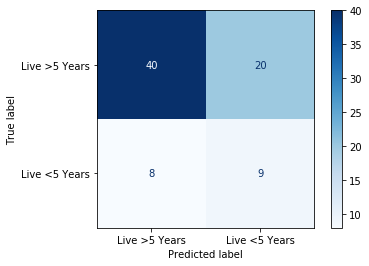

In [70]:

# Fit classifier with best parameters and make test predictions
clf_f5 = RandomForestClassifier(**best_f5_params)
clf_f5.fit(X_train, y_train)
y_hat_test_f5 = clf_f5.predict(X_test)

# Display f5 score
print(f'F5 Score: {fbeta_score(y_test, y_hat_test_f5, beta=0.01)}')

# Plot confusion matrix
plot_confusion_matrix(clf_f5, X_test, y_test, cmap='Blues',
                      display_labels=['Live >5 Years', 'Live <5 Years']);

In [71]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LogisticRegression()